# MovieLens 1M Dataset

## 1. The dataset is the collections of movie ratings from users of MovieLens in the late 1990s and early 2000s. The data provides movie ratings, movie genres and year, and demorgraphic data about the users. For this dataset, we would like to explore the data slicing and dicing. The dataset is combined by 3 tables: ratings, user information, and movie information. 

### 1.1 Load Data after unzip the files

In [1]:
import pandas as pd

# Since the file is too large, we would like to display smaller data once a time

pd.options.display.max_rows = 10

user_names = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep = '::', header = None, names = user_names, engine = 'python')

rating_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep = '::', header = None, names = rating_names, engine= 'python')

movie_names = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep = '::', header = None, names = movie_names, engine = 'python')

### 1.2 Show the head of the loaded datasets

In [2]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [3]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### 1.3 Merge three tables into one structured dataframe

> Since analyzing the data spread across three tables are not easy to do. Therefore, we would like to merge all the three tables together into a single table. Firstly, we merge users table and ratings table since they both have 'user_id' column. Then, we used the new table to merge with the movies table joint with 'movie_id'. 

In [5]:
data = pd.merge(pd.merge(users, ratings), movies)
data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


# 2. Explore the stats of the newly constructed table. - Find preferred movies from different genders

## 2.1 Get the mean movie ratings for each film grouped by gender

In [6]:
mean_ratings = data.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = 'mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


## 2.2 Get the number of ratings of each film

In [7]:
num_ratings = data.groupby('title').size()
num_ratings.head(10)

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

Since some movies have low number of ratings. Therefore, we would like to exclude some movies that have little ratings to eliminate bias of the final results. We will only investigate the top 10 movies based on rating number and group by gender.

In [8]:
num_ratings_sort = num_ratings.sort_values(ascending = False)
top_num_ratings = num_ratings_sort[0:10]
top_num_ratings

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

The table below shows the mean ratings of the top 10 most rated movies and group by gender

In [9]:
mean_ratings.loc[top_num_ratings.index]

gender,F,M
title,,
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
Saving Private Ryan (1998),4.114783,4.398941
Terminator 2: Judgment Day (1991),3.785088,4.115367
"Matrix, The (1999)",4.128405,4.362235
Back to the Future (1985),3.932707,4.009259


In order to present more clear visulazation, we will use the __seaborn__ package to plot the bar chart as the followings.

In [10]:
import seaborn as sns

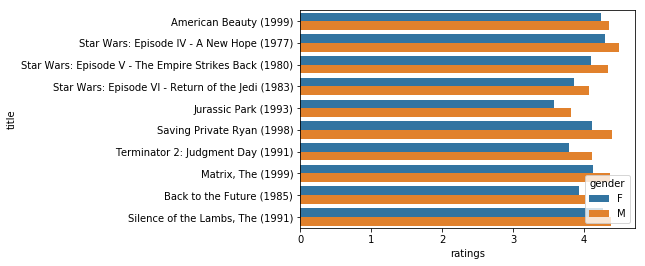

In [11]:
top_mean_ratings = mean_ratings.loc[top_num_ratings.index]
top_mean_subset = top_mean_ratings.unstack()
top_mean_subset = top_mean_subset.reset_index()
top_mean_subset = top_mean_subset.rename(columns = {0:'ratings'})
sns.barplot(x = top_mean_subset['ratings'], y = top_mean_subset['title'], hue = top_mean_subset['gender'])

# 3. Measure Mean Rating Disaggreement

Since there exists mean rating difference between different gender. We would like to find the movies that are most divisive between male and female viewers. 

In [14]:
mean_ratings['diff'] = abs(mean_ratings['M'] - mean_ratings['F'])
mean_ratings_sort = mean_ratings.sort_values(by = 'diff', ascending = False)
mean_ratings_sort[0:10]

gender,F,M,diff
title,,,
Tigrero: A Film That Was Never Made (1994),1.000000,4.333333,3.333333
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
"Neon Bible, The (1995)",1.000000,4.000000,3.000000
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
"Enfer, L' (1994)",1.000000,3.750000,2.750000
Babyfever (1994),3.666667,1.000000,2.666667
Stalingrad (1993),1.000000,3.593750,2.593750
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429
